In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Generate Dataset

In [116]:
X, Y = make_blobs(n_samples = 500, n_features = 2, centers = 2, random_state = 11)

In [117]:
X.shape, Y.shape

((500, 2), (500,))

## Visualize Dataset

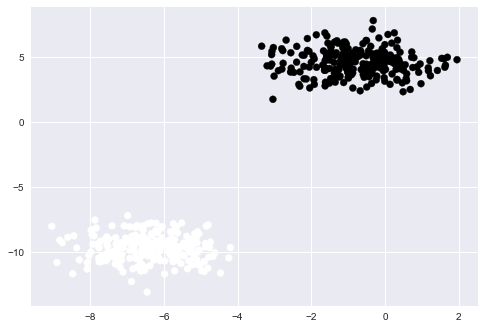

In [118]:
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

## Modelling

```sigmoid()``` 

$ H_{\theta}(x) = \frac{1}{1 + e^{-z}}$

In [119]:
def sigmoid(z):
    '''Sigmoid Function'''
    return (1.0)/(1 + np.exp(-z))

### Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the Predictions

In [120]:
def Predict(x, weights):
    
    z = np.dot(x, weights)
    
    Predictions = sigmoid(z)
    return Predictions

In [121]:
def Loss(X, Y, weights):
    '''Binary Cross Entropy'''
    
    y = Predict(X, weights)
    cost = Y*(np.log(y)) + (1 - Y)*np.log(1 - y)
    cost = -cost
    cost = np.mean(cost)
    return cost

In [122]:
def GradientDescent(X, Y, weights, Lr):
    '''Applying GradientDescent'''
    
    y = Predict(X, weights)
    descent = np.dot(X.T,y - Y)
    
    m = X.shape[0]
    weights = weights - Lr * descent/(float(m))
    return weights

In [123]:
def Train(X, Y, Lr = 0.5, MaxEpochs = 500):
    
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    loss = []
    
    weights = np.zeros(X.shape[1])
    
    
    for epoch in range(MaxEpochs):
       
    
        weights = GradientDescent(X, Y, weights, Lr)
        
        loss.append(Loss(X, Y, weights))
        
    
    return loss, weights
            
            

In [124]:
loss, weights = Train(X.copy(), Y)

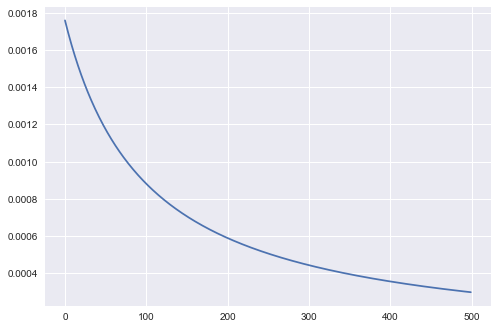

In [125]:
plt.plot(loss)
plt.show()

In [139]:
def GetPredictions(X_test, weights, labels = True):
    
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0], 1))
        
        X_test = np.hstack((ones, X_test))
        
    probs = Predict(X_test, weights)
    
    if labels:
        labels = np.zeros((probs.shape))
        labels[probs >= 0.5] =1
        return labels
        
    else:
        return probs

In [140]:
labels = GetPredictions(X, weights, True)

In [141]:
X.shape

(500, 2)

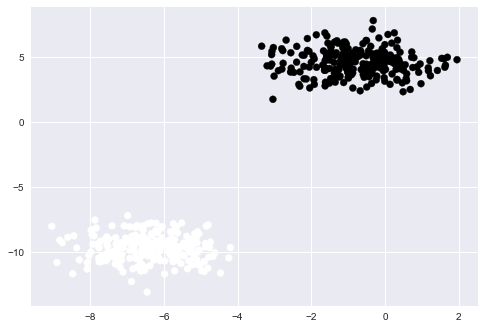

In [142]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [146]:
x1 = np.linspace(-10, 3, num = 15)

x2 = - (weights[0] + x1 * weights[1])/weights[2]

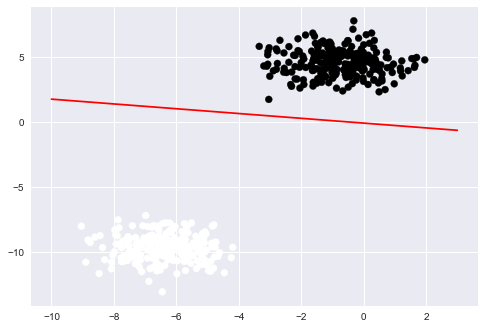

In [149]:
plt.plot(x1, x2, c = "red")
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.show()

## Accuracy

In [150]:
print(np.sum(labels == Y))

500


In [161]:
weights = np.array([7, 0.8, 1, 0.4, 0.8])

In [162]:
temp = np.array([[1, 5,1,0,0.53]])

In [163]:
GetPredictions(temp, weights)

array([1.])

In [ ]:
def GetPredictions(X_test, weights, labels = True):
    
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0], 1))
        
        X_test = np.hstack((ones, X_test))
        
    probs = Predict(X_test, weights)
    
    if labels:
        labels = np.zeros((probs.shape))
        labels[probs >= 0.5] =1
        return labels
        
    else:
        return probs